<a href="https://colab.research.google.com/github/Praveenbhukya896/huffman_coding/blob/main/huffman_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 4: Merging nodes with frequencies 3 and 5


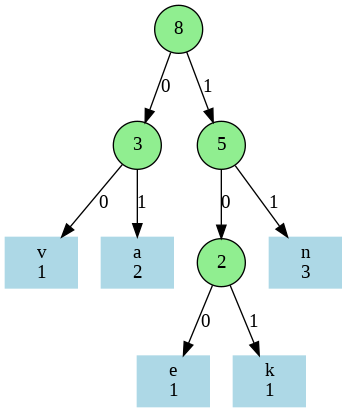

Button(button_style='info', description='Next Step', style=ButtonStyle())

In [6]:
import heapq
from collections import defaultdict
from graphviz import Digraph
from IPython.display import display, Image, clear_output
import ipywidgets as widgets

# Huffman Tree Node Class
class Node:
    def __init__(self, char, freq, index):
        self.char = char
        self.freq = freq
        self.index = index  # Store the original index for sorting
        self.left = None
        self.right = None

    def __lt__(self, other):
        # Custom comparison: frequency, then index for individual nodes,
        # and left child's character if it's a merged node
        if self.freq == other.freq:
            # Check left child's character for merged nodes
            left_char_self = self.left.char if self.left and not self.char else self.char
            left_char_other = other.left.char if other.left and not other.char else other.char
            return left_char_self < left_char_other
        return self.freq < other.freq

def visualize_huffman_tree(root, step_num):
    graph = Digraph()
    graph.attr(rankdir="TB")  # Top to Bottom layout

    def add_nodes_edges(node, parent=None, label=""):
        node_id = str(id(node))
        if node.char:
            # Leaf node (character with frequency)
            label_text = f"{node.char}\n{node.freq}"
            graph.node(node_id, label_text, shape="box", style="filled", color="lightblue")  # Change to light blue
        else:
            # Internal node (frequency only)
            label_text = f"{node.freq}"
            graph.node(node_id, label_text, shape="circle", style="filled", fillcolor="lightgreen")  # Change to light green

        if parent:
            # Connect the parent node with the current node
            graph.edge(str(id(parent)), node_id, label=label)

        # Recur for left and right children
        if node.left:
            add_nodes_edges(node.left, node, "0")
        if node.right:
            add_nodes_edges(node.right, node, "1")

    add_nodes_edges(root)

    # Save and display each step of the tree
    filename = f"huffman_tree_step_{step_num}.png"
    graph.render(filename, format="png", cleanup=True)
    display(Image(filename=f"{filename}.png"))

# Interactive Huffman Tree Building with Visualization
class HuffmanVisualizer:
    def __init__(self, frequency):
        self.frequency = frequency
        self.sorted_characters = list(frequency.items())
        # Sort the characters based on their frequencies and then alphabetically
        self.sorted_characters.sort(key=lambda item: (item[1], item[0]))  # Sort by frequency, then alphabetically
        self.nodes = [Node(char, freq, index) for index, (char, freq) in enumerate(self.sorted_characters)]
        self.step_num = 0
        self.root = None  # To store the final Huffman tree root

    def next_step(self):
        if self.step_num == 0:
            # Display initial characters and frequencies
            clear_output(wait=True)
            print("Characters and their frequencies (sorted by frequency):")
            for char, freq in self.sorted_characters:
                print(f"{char}: {freq}")
            self.step_num += 1
            return self.step_num

        if len(self.nodes) <= 1:
            self.root = self.nodes[0] if self.nodes else None  # Get the final root
            return None  # No more steps

        # Always take the leftmost two nodes with minimum frequencies
        left = self.nodes[0]  # First node (leftmost)
        right = self.nodes[1]  # Second node (next to leftmost)

        # Merge nodes
        merged = Node(None, left.freq + right.freq, min(left.index, right.index))  # Use the min index
        merged.left = left
        merged.right = right

        # Remove the two nodes from the list
        self.nodes = self.nodes[2:]  # Remove the first two nodes
        # Add the merged node back to the nodes list
        self.nodes.append(merged)

        # Sort the nodes based on frequency and left child’s character
        self.nodes.sort()  # Sorts using the __lt__ method defined in the Node class

        # Display the tree at the current step
        clear_output(wait=True)
        print(f"Step {self.step_num}: Merging nodes with frequencies {left.freq} and {right.freq}")
        visualize_huffman_tree(merged, self.step_num)

        self.step_num += 1

        return self.step_num

    def get_huffman_codes(self):
        codes = {}

        def generate_codes(node, current_code=""):
            if node:
                if node.char is not None:  # Leaf node
                    codes[node.char] = current_code
                generate_codes(node.left, current_code + "0")
                generate_codes(node.right, current_code + "1")

        generate_codes(self.root)
        return codes

# Update navigation button handlers
def on_next_clicked(b):
    next_step()

def next_step():
    step = visualizer.next_step()
    if step is None:
        # Tree construction complete, display Huffman codes
        codes = visualizer.get_huffman_codes()
        clear_output(wait=True)
        print("Huffman Tree construction complete!")
        print("Huffman Codes:")
        for char, code in codes.items():
            print(f"{char}: {code}")
        next_button.disabled = True  # Disable Next button after showing codes
    else:
        display(next_button)

# Wrapper to run the Huffman Coding Visualization
def run_huffman_coding_visualization(input_text):
    # Parse the input text for frequencies
    frequency = defaultdict(int)
    pairs = input_text.split(",")
    for pair in pairs:
        try:
            char, freq = pair.split(":")
            frequency[char.strip()] = int(freq.strip())
        except ValueError:
            print(f"Invalid frequency pair: {pair}. Please enter in the format a:2, b:3.")

    # Initialize the Huffman Visualizer
    visualizer = HuffmanVisualizer(frequency)
    return visualizer

# Update to handle string input
def run_huffman_coding_with_string(string_input):
    frequency = defaultdict(int)

    # Count frequencies of characters in the string input (case insensitive)
    for char in string_input.lower():  # Convert to lowercase for case insensitivity
        frequency[char] += 1

    # Initialize the Huffman Visualizer
    visualizer = HuffmanVisualizer(frequency)
    return visualizer

# UI Elements
frequency_input = widgets.Text(
    description="Frequency Input (a:2, b:3, c:5):",
    placeholder="Enter frequencies in the format a:2, b:3, c:5",
)

string_input = widgets.Text(
    description="String Input:",
    placeholder="Enter a string (case insensitive)",
)

or_label = widgets.Label(value="or")

# Create a horizontal box layout for inputs
input_box = widgets.HBox([frequency_input, or_label, string_input])

start_button = widgets.Button(
    description="Start Huffman Coding",
    button_style="success"
)

next_button = widgets.Button(
    description="Next Step",
    button_style="info",
    disabled=True  # Initially disabled
)

# Button click handler for Start
def on_start_clicked(b):
    clear_output(wait=True)
    frequency_string = frequency_input.value
    input_string = string_input.value

    global visualizer
    if frequency_string:
        visualizer = run_huffman_coding_visualization(frequency_string)
        input_box.layout.display = 'none'  # Hide the input box after starting
        start_button.layout.display = 'none'  # Hide the start button after starting
        next_step()  # Show the first step
        next_button.disabled = False  # Enable Next button
    elif input_string:
        visualizer = run_huffman_coding_with_string(input_string)
        input_box.layout.display = 'none'  # Hide the input box after starting
        start_button.layout.display = 'none'  # Hide the start button after starting
        next_step()  # Show the first step
        next_button.disabled = False  # Enable Next button
    else:
        print("Please enter either frequency input or a string to start the Huffman coding process.")

    display(next_button)  # Only display the next button

start_button.on_click(on_start_clicked)
next_button.on_click(on_next_clicked)
# Display UI
display(input_box, start_button)
